# Heart Disease

In this example I have used different feature tuning techniques and applied each of them on different ML algorithms to compare their accuracies to see which one is the better model.
<br>
Feature selection is also demonstrated but could not make it to the prediction stage since it was not necessary not required.

__[Dataset can be found here](https://www.kaggle.com/ronitf/heart-disease-uci)__

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

heart_disease = pd.read_csv("/home/aditya/Downloads/heart.csv")
X = heart_disease[["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]]
y = heart_disease["target"]

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state = 1, test_size = 0.1)

# Feature selection 

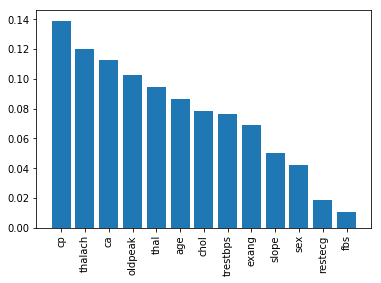

In [22]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500)
forest.fit(x_train, y_train)

importances = forest.feature_importances_
indices =np.argsort(importances)[::-1]

plt.bar(range(x_train.shape[1]),importances[indices])
plt.xticks(range(x_train.shape[1]),heart_disease.columns[indices], rotation=90)
plt.show()

In [23]:
heart_disease.columns[indices][:2]
# Most important features are these

Index(['cp', 'thalach'], dtype='object')

In [24]:
X_new = X.values[:,[2,7]]

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_new,y, random_state = 1, test_size = 0.1)

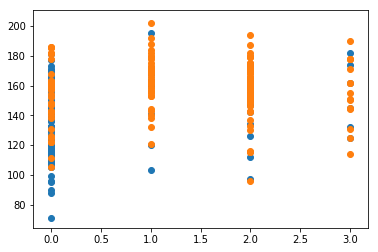

In [26]:
plt.scatter(x_train[y_train ==0,0],x_train[y_train==0,1])
plt.scatter(x_train[y_train ==1,0],x_train[y_train==1,1])

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state = 1, test_size = 0.1)

# Feature Extraction 

#####  Using LDA 

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
lda = LDA(n_components = None)
x_train_lda = lda.fit_transform(x_train, y_train)
x_test_lda = lda.fit_transform(x_test, y_test)

##### Using KPCA

In [43]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=3, kernel = "rbf",gamma = 15)
x_train_kpca = kpca.fit_transform(x_train)
x_test_kpca = kpca.fit_transform(x_test)

##### Using PCA 

In [44]:
from sklearn.decomposition import PCA
kpca = PCA(n_components=2)
x_train_pca = kpca.fit_transform(x_train)
x_test_pca = kpca.fit_transform(x_test)

# Prediction using different Algorithms on different training set 

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = "liblinear",multi_class = "auto")


lr.fit(x_train_lda, y_train)

y_pred = lr.predict(x_test_lda)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.967741935483871

In [46]:
from sklearn.svm import SVC
svm = SVC(kernel = "rbf",gamma = 2**-5, C = 1.0)
svm.fit(x_train_lda, y_train)
y_pred = svm.predict(x_test_lda)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9354838709677419

In [47]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="gini",
                             max_depth=4,
                             random_state = 1)
tree.fit(x_train_lda, y_train)
y_pred = tree.predict(x_test_lda)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9354838709677419

In [48]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion="gini",
                               n_estimators=25,
                               random_state = 1,
                               n_jobs = 2)
forest.fit(x_train_lda, y_train)
y_pred = tree.predict(x_test_lda)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9354838709677419

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p = 2,
                          metric = "minkowski")
knn.fit(x_train_lda, y_train)
y_pred = knn.predict(x_test_lda)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.967741935483871

# Comparing average accuracy of different models for better model selection 

In [50]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=lr,
                       X = x_train_lda,
                       y = y_train,
                       cv = 10,
                       n_jobs = 1)
print("\t\tAverage Accuracy for Logistic Regression",end = "\n\n")
print("CV accuracy scores {}".format(scores), end = "\n\n")
print("CV accuracy: {mean} +/- {standard_deviation}"
      .format(mean = np.mean(scores),
             standard_deviation = np.std(scores)))

		Average Accuracy for Logistic Regression

CV accuracy scores [0.64285714 0.82142857 0.77777778 0.81481481 0.88888889 0.92592593
 0.77777778 0.96296296 0.92592593 0.88888889]

CV accuracy: 0.8427248677248678 +/- 0.0906532542915445


In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=svm,
                       X = x_train_lda,
                       y = y_train,
                       cv = 10,
                       n_jobs = 1)
print("\t\tAverage Accuracy for SVM",end = "\n\n")
print("CV accuracy scores {}".format(scores), end = "\n\n")
print("CV accuracy: {mean} +/- {standard_deviation}"
      .format(mean = np.mean(scores),
             standard_deviation = np.std(scores)))

		Average Accuracy for SVM

CV accuracy scores [0.64285714 0.82142857 0.74074074 0.81481481 0.88888889 0.88888889
 0.77777778 0.92592593 0.92592593 0.88888889]

CV accuracy: 0.8316137566137567 +/- 0.08648821434328831


In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=tree,
                       X = x_train_lda,
                       y = y_train,
                       cv = 10,
                       n_jobs = 1)
print("\t\tAverage Accuracy for Decision Trees",end = "\n\n")
print("CV accuracy scores {}".format(scores), end = "\n\n")
print("CV accuracy: {mean} +/- {standard_deviation}"
      .format(mean = np.mean(scores),
             standard_deviation = np.std(scores)))

		Average Accuracy for Decision Trees

CV accuracy scores [0.64285714 0.85714286 0.74074074 0.85185185 0.92592593 0.92592593
 0.85185185 0.81481481 0.88888889 0.66666667]

CV accuracy: 0.8166666666666667 +/- 0.09575148223858486


In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=forest,
                       X = x_train_lda,
                       y = y_train,
                       cv = 10,
                       n_jobs = 1)
print("\t\tAverage Accuracy for Random Forest",end = "\n\n")
print("CV accuracy scores {}".format(scores), end = "\n\n")
print("CV accuracy: {mean} +/- {standard_deviation}"
      .format(mean = np.mean(scores),
             standard_deviation = np.std(scores)))

		Average Accuracy for Random Forest

CV accuracy scores [0.67857143 0.78571429 0.77777778 0.7037037  0.88888889 0.81481481
 0.77777778 0.7037037  0.74074074 0.55555556]

CV accuracy: 0.7427248677248677 +/- 0.08547727126895267


In [54]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=knn,
                       X = x_train_lda,
                       y = y_train,
                       cv = 10,
                       n_jobs = 1)
print("\t\tAverage Accuracy for KNN",end = "\n\n")
print("CV accuracy scores {}".format(scores), end = "\n\n")
print("CV accuracy: {mean} +/- {standard_deviation}"
      .format(mean = np.mean(scores),
             standard_deviation = np.std(scores)))

		Average Accuracy for KNN

CV accuracy scores [0.67857143 0.85714286 0.74074074 0.74074074 0.88888889 0.88888889
 0.81481481 0.85185185 0.92592593 0.81481481]

CV accuracy: 0.8202380952380951 +/- 0.07464924559662199


**From the above example it is clear that logistic regression is the best model for prediction on this dataset, which makes sense since it is a classification problem**
<br>
I have used *lda* values for prediction, however *pca* and *kpca* can also be used only the variable names are needed to be changed